### 1. Implementing the intensity transformation

256


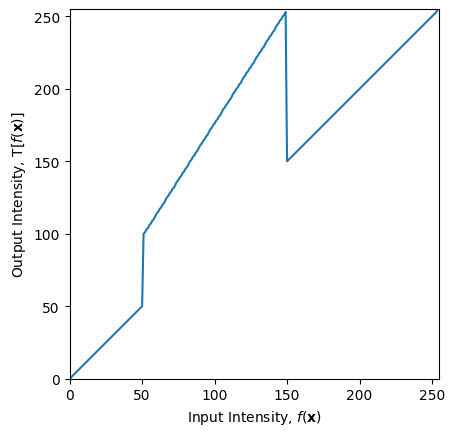

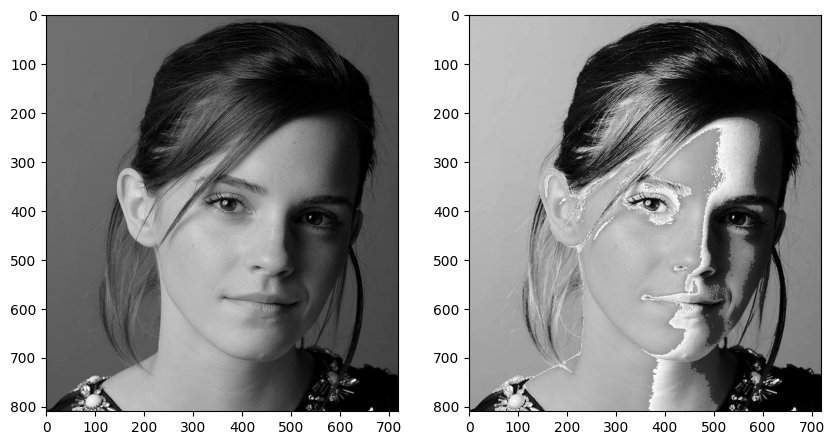

In [18]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

#generating intensity map
transform = np.linspace(start = 0, stop = 50, num = 51, dtype=np.uint8)
transform = np.insert(transform,transform.size, np.linspace(start = 100, stop = 255, num = 100, dtype=np.uint8))
transform = np.insert(transform,transform.size-1, np.linspace(start = 150, stop = 255, num = 105, dtype=np.uint8))
#print(transform.size)
fig,ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel( r'Input Intensity, $f(\mathbf{x})$')
ax.set_ylabel('Output Intensity, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
plt.savefig('task1_transform.png')
plt.show()

img_orig = cv.imread('emma_gray.jpg', cv.IMREAD_GRAYSCALE)
image_transformed = cv.LUT(img_orig, transform)
fig,ax = plt.subplots(1,2,figsize=(10,30))
ax[0].imshow(img_orig,cmap='gray', vmin=0, vmax=255)
ax[1].imshow(image_transformed,cmap='gray', vmin=0, vmax=255)
plt.show()

### 2. Apply a similar operation as above to fig 2

256


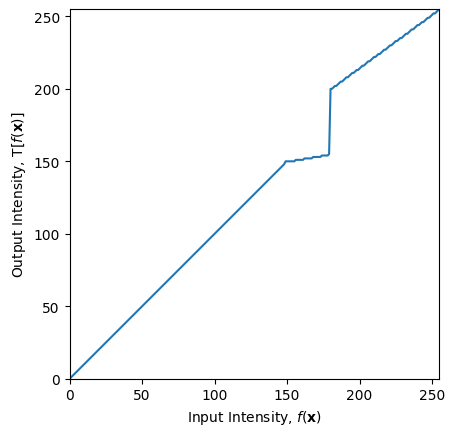

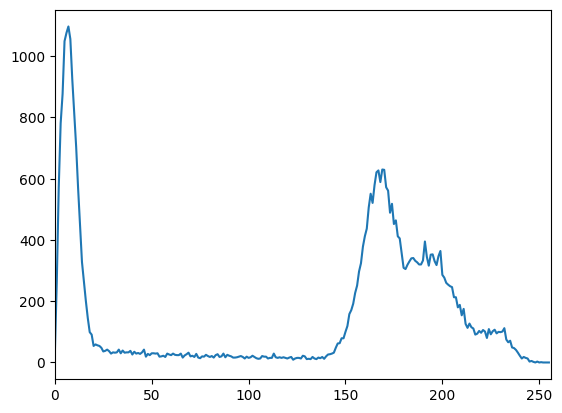

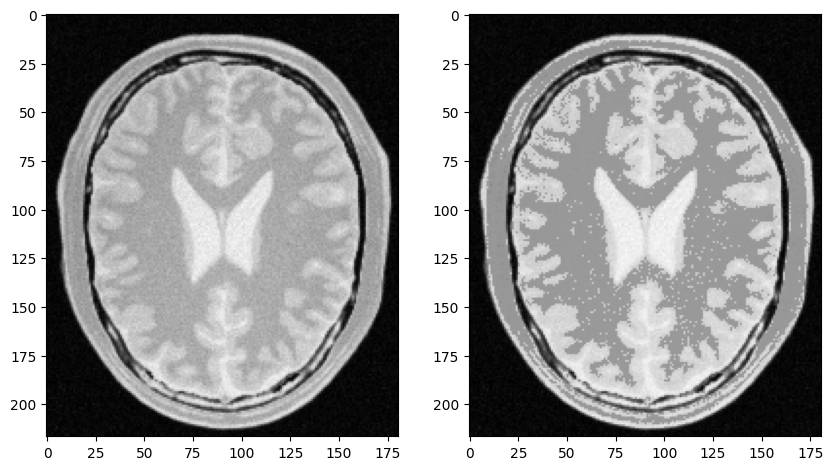

In [40]:

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
cv.destroyAllWindows()
#generating intensity map
transform2 = np.linspace(start = 0, stop = 150, num = 150, dtype=np.uint8)
transform2 = np.insert(transform2,transform2.size, np.linspace(start = 150, stop = 155, num = 30, dtype=np.uint8))
transform2 = np.insert(transform2,transform2.size, np.linspace(start = 200, stop = 255, num = 76, dtype=np.uint8))


print(transform2.size)
fig,ax = plt.subplots()
ax.plot(transform2)
ax.set_xlabel( r'Input Intensity, $f(\mathbf{x})$')
ax.set_ylabel('Output Intensity, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
plt.savefig('task2_transform.png')
plt.show()

img_orig2 = cv.imread('brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)

hist = cv.calcHist([img_orig2], [0], None, [256], [0,256])
plt.plot(hist)
plt.xlim([0,256])
plt.show()


image_transformed2 = cv.LUT(img_orig2, transform2)
fig,ax = plt.subplots(1,2,figsize=(10,30))
ax[0].imshow(img_orig2,cmap='gray', vmin=0, vmax=255)
ax[1].imshow(image_transformed2,cmap='gray', vmin=0, vmax=255)
plt.show()